## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [4]:
fname = 'sqlResult_1558435.csv'

In [5]:
import pandas as pd
import re
import jieba
import numpy as np

In [6]:
content = pd.read_csv(fname, encoding='gb18030')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
xinhua_news = content[content['source'] == '新华社']

In [6]:
len(xinhua_news) / len(content) # 有87.78%的新闻来自新华社

0.8778051801676133

### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [7]:
content['label'] = content['source'].apply(lambda x: 1 if x == '新华社' else 0)

In [8]:
news = content[['content', 'label']]

这样我们就得到了一个带有标记的数据，叫做news

In [9]:
news.head()

,content,label
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0


In [10]:
news['label'].value_counts()

1    78661
0    10950
Name: label, dtype: int64

In [11]:
corpus = news['content'].tolist()

In [12]:
clean_corpus = list()
for sentence in corpus:
    sentence = ''.join(re.findall(r'\w+', str(sentence)))
    clean_corpus.append(' '.join(jieba.cut(sentence)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZHANGB~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.857 seconds.
Prefix dict has been built succesfully.


In [15]:
clean_corpus[:1]

['此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息']

In [13]:
y = news['label'].values.astype(np.int)

In [14]:
y.shape, len(clean_corpus)

((89611,), 89611)

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [16]:
from pyltp import Segmentor
from pyltp import SentenceSplitter
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=1000, token_pattern=r'\w+') # max_features 

In [58]:
X = vectorizer.fit_transform(clean_corpus) # X is the term-document matrix of the whole corpus

In [59]:
X[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [60]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=X[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(15)

,tfidf
发布,0.315998
6,0.215984
也,0.213918
手机,0.210384
研发,0.206915
时候,0.198877
集中,0.195529
确保,0.195319
开发,0.192860
一年,0.191815


In [61]:
X = X.toarray()

In [62]:
X.shape, y.shape

((89611, 1000), (89611,))

### 数据集不平衡，现在有连个策略：
1. Oversample 非新华社文章
2. 产生多一些非新华社文章

In [16]:
!pip install imblearn.over_sampling

  ERROR: Could not find a version that satisfies the requirement imblearn.over_sampling (from versions: none)
ERROR: No matching distribution found for imblearn.over_sampling


In [1]:
from imblearn.over_sampling import SMOTE, ADASYN

In [106]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

NameError: name 'Counter' is not defined

In [110]:
len(X_resampled), len(y_resampled), len(X), len(y)

(157322, 157322, 89611, 89611)

### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y) # Split the data into training and testing set

In [64]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)
# Further split train set into training and validation set
# test_size represents the proportion of the dataset to include in the test split

对第一篇新闻做个小测试：
手动写一个predict函数，运用KNN的原理，通过找出最相似的5篇新闻，做一个投票，看它是不是新华社的新闻。如果最相似的5篇新闻里有三篇或以上都属于新华社，则该新闻也来自新华社。然而，结果不对。测试结果是有三篇新华社文章出现在最相似文章中，可是该文章事实上不是新华社的。>>>> 可见该方法并不准确。还是需要调用sklearn.neighbors的KNeighborsClassifer

In [274]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [278]:
model = model(X_train, y_train)

In [314]:
model[0]

(<1x1637193 sparse matrix of type '<class 'numpy.float64'>'
 	with 36 stored elements in Compressed Sparse Row format>, 0)

In [277]:
def similarity(x1, x2):
    return cosine_similarity(x1, x2)

In [281]:
similarity(model[1][0],model[4][0])

array([[0.]])

In [313]:
def counter(most_similars, k= 5):
    count = 0
    for i in range(len(most_similars)):
        count += most_similars[i][1]
    prediction = count / k
    return prediction

In [286]:
def predict(x,  k = 5):
    most_similars = sorted(model, key=lambda xi: similarity(xi[0], x))[:k]
    # key parameter to specify a function to be called on each list element prior to making comparisons.
    return most_similars

In [283]:
test1 = predict(model[0][0], k =5)

In [316]:
similarity(model[0][0], model[1][0])

array([[0.]])

In [307]:
counter(test1) # 超过0.5，说明预测该文章为新华社文章

0.6

In [398]:
content['source'].iloc[0] # 第一篇文章不是来自新华社的

'快科技@http://www.kkj.cn/'

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

### KNN

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [93]:
KNC = KNeighborsClassifier(n_neighbors= 5, algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
KNC.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [101]:
KNC_metrics = metrics(KNC) # 很慢

Accuracy: 0.9222228421581209
Precision: 0.9775527875840938
Recall: 0.9328163732282464
F1: 0.9546607688805049
ROC AUC Score: 0.8894675473447168


### 另一种metric：K-Fold Cross-Validation
The train-test-split method we used in earlier is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cv_scores = cross_val_score(KNC, X, y, cv=5)

In [104]:
cv_scores

array([0.88807677, 0.86312912, 0.86619797, 0.89186475, 0.88667559])

In [105]:
print('cv_scores means:{}'.format(np.mean(cv_scores)))

cv_scores means:0.8791888396744463


Use cross-validation, our mean score is about 0.911.比不用cross_validation低。这个数据才更有说服力。

### 总结一下，评价模型好坏的metrics有这些：（分别用训练集，验证集，和测试集）

In [29]:
def metrics_on_train(model):
    accuracy = model.score(x_train, y_train)
    precision = precision_score(y_train, model.predict(x_train))
    recall = recall_score(y_train, model.predict(x_train))
    f1 = f1_score(y_train, model.predict(x_train))
    roc_auc = roc_auc_score(y_train, model.predict(x_train))
    # cv_scores = np.mean(cross_val_score(model, X, y, cv=5))
    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}\nROC AUC Score: {}'.format(accuracy, precision, recall, f1, roc_auc))
    return [accuracy, precision, recall, f1, roc_auc]

In [30]:
def metrics_on_valid(model):
    accuracy = model.score(x_valid, y_valid)
    precision = precision_score(y_valid, model.predict(x_valid))
    recall = recall_score(y_valid, model.predict(x_valid))
    f1 = f1_score(y_valid, model.predict(x_valid))
    roc_auc = roc_auc_score(y_valid, model.predict(x_valid))
    # cv_scores = np.mean(cross_val_score(model, X, y, cv=5))
    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}\nROC AUC Score: {}'.format(accuracy, precision, recall, f1, roc_auc))
    return [accuracy, precision, recall, f1, roc_auc]

In [31]:
def metrics(model):
    accuracy = model.score(X_test, Y_test)
    precision = precision_score(Y_test, model.predict(X_test))
    recall = recall_score(Y_test, model.predict(X_test))
    f1 = f1_score(Y_test, model.predict(X_test))
    roc_auc = roc_auc_score(Y_test, model.predict(X_test))
    # cv_scores = np.mean(cross_val_score(model, X, y, cv=5))
    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}\nROC AUC Score: {}'.format(accuracy, precision, recall, f1, roc_auc))
    return [accuracy, precision, recall, f1, roc_auc]

### 继续尝试新的模型

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

LR model运行很快 :)

In [66]:
LR = LogisticRegression(solver = 'saga').fit(x_train, y_train)

In [68]:
LR_metrics = metrics(LR)

Accuracy: 0.9960944038386431
Precision: 0.9983455297486478
Recall: 0.9972033305790377
F1: 0.9977741032816076
ROC AUC Score: 0.9926655922301582


In [70]:
metrics_on_train(LR)

Accuracy: 0.9974019180470793
Precision: 0.9988467579981309
Recall: 0.9981917895322497
F1: 0.9985191663602302
ROC AUC Score: 0.9949671931715918


[0.9974019180470793,
 0.9988467579981309,
 0.9981917895322497,
 0.9985191663602302,
 0.9949671931715918]

In [71]:
metrics_on_valid(LR)

Accuracy: 0.9959548054121914
Precision: 0.9979358526516354
Recall: 0.9974607205205523
F1: 0.9976982300182554
ROC AUC Score: 0.9912418809976034


[0.9959548054121914,
 0.9979358526516354,
 0.9974607205205523,
 0.9976982300182554,
 0.9912418809976034]

### SVM
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [88]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [469]:
SVM = svm.SVC(probability= True).fit(x_train, y_train) # SVC很慢，以至于我不敢尝试调参，但metrics效果很好，ROC AUC Score到了0.96

In [89]:
LinearSVM = LinearSVC().fit(x_train, y_train)
# Similar to SVC with parameter kernel=’linear’, 
# but implemented in terms of liblinear rather than libsvm, 
# so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [90]:
LinearSVM_metrics = metrics(LinearSVM)

Accuracy: 0.9972102884561737
Precision: 0.9991089045891414
Recall: 0.9977118159283036
F1: 0.9984098715176187
ROC AUC Score: 0.9956595609321883


### Gaussian Naive Bayes
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

In [72]:
GNB = GaussianNB().fit(x_train, y_train)

In [73]:
GNB_metrics = metrics(GNB)

Accuracy: 0.9859398538191151
Precision: 0.9927430135591062
Recall: 0.9912286277251636
F1: 0.9919852426690414
ROC AUC Score: 0.9695869166023079


ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks.

In [74]:
CNB = ComplementNB().fit(x_train, y_train)

In [75]:
CNB_metrics = metrics(CNB)

Accuracy: 0.881716230541762
Precision: 0.9953424059384324
Recall: 0.8693192652386703
F1: 0.9280721992264368
ROC AUC Score: 0.9200477604732166


MNB

In [76]:
MNB = MultinomialNB().fit(x_train, y_train)

In [77]:
MNB_metrics = metrics(MNB)

Accuracy: 0.9390726998828322
Precision: 0.9783077425677883
Recall: 0.951693891819742
F1: 0.9648173207036536
ROC AUC Score: 0.9000478591518801


### Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [51]:
from sklearn import tree

In [78]:
DT = tree.DecisionTreeClassifier().fit(x_train, y_train)

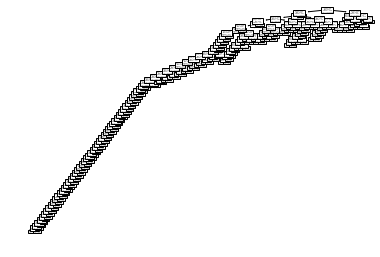

In [79]:
tree.plot_tree(DT)

In [80]:
DT_metrics = metrics(DT)

Accuracy: 0.997042905763544
Precision: 0.9986008649198678
Recall: 0.9980296192715947
F1: 0.9983151603776583
ROC AUC Score: 0.993991978585569


### Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 1).fit(x_train, y_train)

In [86]:
RF_metrics = metrics(RF)

Accuracy: 0.9968197288400379
Precision: 0.9975876079228034
Recall: 0.9987923472954936
F1: 0.9981896141019533
ROC AUC Score: 0.9907203745609889


### 总结一下，各个模型的metrics如何？

In [115]:
result = pd.DataFrame({
    'Model': ['Linear SVM', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [LinearSVM_metrics[0],KNC_metrics[0], LR_metrics[0], RF_metrics[0], GNB_metrics[0], DT_metrics[0]],
    'Precision Score': [LinearSVM_metrics[1],KNC_metrics[1], LR_metrics[1], RF_metrics[1], GNB_metrics[1], DT_metrics[1]],
    'Recall Score': [LinearSVM_metrics[2],KNC_metrics[2], LR_metrics[2], RF_metrics[2], GNB_metrics[2], DT_metrics[2]],
    'F1 Score': [LinearSVM_metrics[3],KNC_metrics[3], LR_metrics[3], RF_metrics[3], GNB_metrics[3], DT_metrics[3]],
    'ROC AUC Score': [LinearSVM_metrics[4],KNC_metrics[4], LR_metrics[4], RF_metrics[4], GNB_metrics[4], DT_metrics[4]],
})


In [116]:
result

,Model,Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Linear SVM,0.997210,0.999109,0.997712,0.998410,0.995660
1,KNN,0.922223,0.977553,0.932816,0.954661,0.889468
2,Logistic Regression,0.996094,0.998346,0.997203,0.997774,0.992666
3,Random Forest,0.996820,0.997588,0.998792,0.998190,0.990720
4,Naive Bayes,0.985940,0.992743,0.991229,0.991985,0.969587
5,Decision Tree,0.997043,0.998601,0.998030,0.998315,0.993992


### Step6: 使用 test_data 对其进行新数据的判断

In [421]:
result = KNC.predict(X_test)

In [426]:
output = list()
for i in range(len(result)):
    output.append([Y_test[i], result[i]])

In [427]:
output # test data的[实际值，预测值]

[[1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 1],
 [1, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 1],
 [1, 1],
 [0, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 

### Step7: 调整不同的参数，观察变化

#### 调参：增加k的大小

In [86]:
KNC2 = KNeighborsClassifier(n_neighbors= 7, algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
KNC2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [87]:
KNC2_metrics = metrics(KNC2)

Accuracy: 0.926686380628243
Precision: 0.948547253157469
Recall: 0.9690459543634399
F1: 0.9586870401810978
ROC AUC Score: 0.795710191793592


In [412]:
KNC.score(x_valid, y_valid)

0.948040172966941

In [413]:
precision_score(y_train, KNC.predict(x_train))

0.9594232189358312

增加k到7，反而比k=5准确率低

#### 调参：用GridSearchCV寻找最佳K值 （运行太慢了）
GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [ ]:
from sklearn.model_selection import GridSearchCV
KNC2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)

#Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 7)}

#Use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNC2, param_grid, cv=5)

#Fit model to data
knn_gscv.fit(X, y)

In [ ]:
#Check top performing n_neighbors value
knn_gscv.best_params_

### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

某个点指的是最优解，在这里指的是得到最佳metrics的参数。

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [429]:
len(X_test)

17923

In [125]:
def identify_fraud(model):
    content['y'] = y
    content['y_predict'] = model.predict(X)
    fraud_candidates = pd.DataFrame(content[(content.y == 0) & (content.y_predict == 1)])
    print(len(fraud_candidates))
    #print(fraud_candidates.head)
    return fraud_candidates

以Linear SVM模型为例，它认为有40篇新闻抄袭了新华社。把这些新闻的source找出来以后发现，其中大部分都是新华网的新闻。新华网和新华社是相关报社，可以转载新华社的新闻，所以不属于抄袭范畴。提出新华网的新闻以后，还剩下12个涉嫌抄袭的新闻。

In [128]:
fraud_candidates = identify_fraud(LinearSVM)

40


In [129]:
fraud_candidates['source']

331                                                    新华网
335                                                    新华网
376                                                    新华网
388                                                    新华网
445                                                    新华网
556                                                    新华网
569                                                    新华网
573                                                    新华网
579                                                    新华网
583                                                    新华网
589                                                    新华网
593                                                    新华网
599                                                    新华网
678                                                    新华网
718                                                    新华网
731      新华社@http://tech.163.com/17/0619/15/CNA7J2EJ000...
994                                                    新

In [159]:
fraud_candidates2 = list()
for i in range(len(fraud_candidates)):
    if fraud_candidates['source'].iloc[i] != '新华网':
        fraud_candidates2.append(fraud_candidates.iloc[i])

print(len(fraud_candidates2))
fraud_candidates2 = pd.DataFrame(fraud_candidates2)
#print(fraud_candidates2)

12


第731篇新闻其实是新华社的，要剔除。还剩11篇涉嫌抄袭的新闻。

In [156]:
fraud_candidates3 = fraud_candidates2[1:]

In [157]:
fraud_candidates3

,id,author,source,content,feature,title,url,label,y,y_predict
1056,88561,张田宇,环球网,前日，太合音乐集团服务艺人、国内英式摇滚领军人物果味VC乐队受邀参加中国麻江蓝莓音乐节。...,"{""type"":""娱乐"",""site"":""环球"",""commentNum"":""0"",""joi...",果味VC麻江蓝莓音乐节首演新曲《躁不完的青春》,http://ent.huanqiu.com/music/yinle-neidi/2017-...,0,0,1
1559,88058,NaN,中国证券网,中国证券网讯 财政部１３日发布消息称，经国务院批准，２０１７年财政部将在境外发行１４０亿...,"{""type"":""债市"",""site"":""中证网"",""commentNum"":""0"",""jo...",财政部将在境外发行140亿元人民币国债,http://www.cs.com.cn/zqxw/201706/t20170613_532...,0,0,1
3622,85995,NaN,cnBeta.COM,访问：Fuze Code Studio\r\n在代码输入方式上，支持Fuze虚拟键盘或者外接...,"{""type"":""软件"",""site"":""cnbeta"",""commentNum"":""2"",...",Fuze Code Studio发布：在Switch主机上编程游戏,http://www.cnbeta.com/articles/soft/624129.htm,0,0,1
5144,84473,李愿 PF015,凤凰财经,职位：\r\n专注宏观经济报道方向的编辑、记者\r\n职位要求：\r\n1、需要一定工作经验...,"{""type"":""财经"",""site"":""凤凰"",""commentNum"":""1"",""joi...",凤凰财经招聘宏观编辑、记者,http://finance.ifeng.com/a/20170223/15211857_0...,0,0,1
5744,83873,NaN,海南日报第014版,新华社记者?任珑?摄\r\n,"{""type"":""体育新闻 文娱新闻 "",""site"":""海南日报"",""commentNum...",《终极斗士4》亮相上海,http://hnrb.hinews.cn/html/2017-06/23/content_...,0,0,1
5908,83709,新华社机器人,中国证券报?中证网,数据来源：机器人 数据采集时间2017/6/22 17:00:10 数据源地址 （这条新闻由...,"{""type"":""数据资金"",""site"":""中证网"",""commentNum"":""0"",""...",6月22日A股全日资金主力净流入、净流出前十大个股,http://www.cs.com.cn/gppd/sjjj/201706/t2017062...,0,0,1
7243,82374,李文瑶,科技日报社-中国科技网,（记者徐玢）由北京大学科维理天文与天体物理研究所博士后于浩然与北京师范大学天文系教授张...,"{""type"":""科技"",""site"":""环球"",""commentNum"":""0"",""joi...",“天河二号”模拟出宇宙暗物质和中微子演化进程,http://tech.huanqiu.com/discovery/2017-06/1083...,0,0,1
7833,81784,NaN,南方日报第01版,神回复\r\n南方日报讯 21日，新华社官方微信推送了一条题为《刚刚，沙特王储被废了》的短新...,"{""type"":""封面"",""site"":""南方日报"",""commentNum"":""0"",""j...",卖得一手好萌，获赞十万+,http://epaper.southcn.com/nfdaily/html/2017-06...,0,0,1
7931,81686,NaN,郑州日报第03版,新华社四川西昌6月19日电 19日0时11分，我国在西昌卫星发射中心用长征三号乙运载火箭发射...,"{""type"":""要闻国内"",""site"":""郑州日报"",""commentNum"":""0"",...",“中星9A”广播电视 直播卫星发射异常,http://zzrb.zynews.cn/html/2017-06/20/content_...,0,0,1
9895,79722,NaN,中国新闻网,中新社雅加达6月13日电 当地时间12日下午，印尼首都雅加达再次发生持枪抢劫凶案，一女青年在...,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",印尼首都雅加达连发持枪劫案 两青年遭劫杀,http://world.huanqiu.com/hot/2017-06/10833815....,0,0,1


涉嫌抄袭的报社包括：

In [158]:
fraud_candidates3['source'].value_counts()

海南日报第014版      1
中国证券网          1
cnBeta.COM     1
凤凰财经           1
中国新闻网          1
南方日报第01版       1
科技日报社-中国科技网    1
中国证券报?中证网      1
郑州日报第03版       1
百度             1
环球网            1
Name: source, dtype: int64

### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

数据思维是，从数据的角度出发，寻找规律和问题的解决方法。机器学习思维是，在了解机器学习的能与不能的基础上，将实际问题与机器学习的方法结合起来。把不是机器学习的问题变成机器学习的问题。融会贯通，从而知道何时何地如何使用机器学习方法解决问题。
以鉴别抄袭新华社新闻这件事为例，要解决这个问题，传统的思维方式是找关键词，以及关键词之间的关系，再结合新闻的各种信息（可能包括发布时间，发布者，等）去编写一个很多规则的程序去找出抄袭的新闻。可是这样的问题就是，关键词和规则越来越多，越来越复杂，也依然难以完美找出抄袭的新闻。
运用数据思维，是否抄袭新闻是可以通过新闻的内容去判断的。抄袭的新闻理论上会用到和被抄袭新闻相似的词，在概率上，它们的相似度应该比不抄袭的新闻的相似度高。
运用机器学习思维，鉴别抄袭新闻实际上是一个二分类问题。如果分类的准确度足够高，我们就能用这个模型去判断一个未知的新闻是否是新华社的。如果判断为新华社的，可实际不是新华社的。这个新闻就有抄袭嫌疑。

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 （我没有用到edit distance）

In [160]:
from sklearn.metrics.pairwise import cosine_similarity

In [218]:
similar_news = cosine_similarity(X[1559:1560], X)

In [220]:
similar_news[0].argsort()[:-5:-1] # 找出与第1559篇新闻最相似的5篇新闻

array([ 1559, 19278, 24961, 23542], dtype=int64)

In [294]:
news['content'].loc[19278] # 其中最相似的新闻是第19278篇

'\u3000\u3000新华社北京４月７日电\u3000中国外汇交易中心４月７日受权公布人民币对美元、欧元、日元、港元、英镑、澳元、新西兰元、新加坡元、瑞士法郎、加元、林吉特、卢布、兰特、韩元、迪拉姆、里亚尔、福林、兹罗提、丹麦克朗、瑞典克朗、挪威克朗、里拉及比索的市场汇价。\\n\u3000\u3000４月７日人民币汇率中间价如下：\\n\u3000\u3000１００美元\u3000\u3000\u3000\u3000\u3000６８９．４９人民币\\n\u3000\u3000１００欧元\u3000\u3000\u3000\u3000\u3000７３４．７０人民币\\n\u3000\u3000１００日元\u3000\u3000\u3000\u3000\u3000６．２２５２人民币\\n\u3000\u3000１００港元\u3000\u3000\u3000\u3000\u3000８８．７４０人民币\\n\u3000\u3000１００英镑\u3000\u3000\u3000\u3000\u3000８６０．７３人民币\\n\u3000\u3000１００澳大利亚元\u3000\u3000５２０．４７人民币\\n\u3000\u3000１００新西兰元\u3000\u3000\u3000４８１．１１人民币\\n\u3000\u3000１００新加坡元\u3000\u3000\u3000４９２．３４人民币\\n\u3000\u3000１００瑞士法郎\u3000\u3000\u3000６８６．８１人民币\\n\u3000\u3000１００加拿大元\u3000\u3000\u3000５１４．５１人民币\\n\u3000\u3000１００人民币\u3000\u3000\u3000\u3000６４．１０２马来西亚林吉特\\n\u3000\u3000１００人民币\u3000\u3000\u3000\u3000８１６．５１俄罗斯卢布\\n\u3000\u3000１００人民币\u3000\u3000\u3000\u3000１９９．５７南非兰特\\n\u3000\u3000１００人民币\u3000\u3000\u3000\u3000１６３９７韩元\\n\u3000\u3000１００人民币\u3000\u3000\u3000\u3000５３．１９８阿联酋迪拉姆\\n\u3000\u3000１００

In [283]:
def clean_news(i):
    content = news['content'].iloc[i]
    content = ''.join(re.findall(r'\w+', content))
    content = ''.join(re.sub(r'[0-9]+', '', content))
    content_list = list()
    content_list.extend(list(jieba.cut(content)))
    return content_list

In [306]:
def get_repeated_words(fraud_news, xinhua_news):
    repeated = list()
    for i in fraud_news:
        if (i in set(xinhua_news)) and (i not in repeated):
            repeated.append(i)
    return repeated

In [305]:
def get_non_repeated_words(fraud_news, xinhua_news):
    non_repeated = list()
    for i in fraud_news:
        if (i not in set(xinhua_news)) and (i not in non_repeated):
            non_repeated.append(i)
    return non_repeated

### 对第1559篇新闻进行分析，看看它与最相似的几篇新闻有什么共同词汇，又有什么改动？
发现相同词都是常见词，是因为它们都是讨论同一个话题而自然产生的，并不属于抄袭。

1. 与第19278篇新闻对比

In [310]:
get_repeated_words(clean_news(1559), clean_news(19278)) # 抄袭新闻与该新闻有以下的相同词

['１', '３', '日', '２', '０', '７', '４', '人民币', '美元', '新华社', '的', '公布']

In [311]:
get_non_repeated_words(clean_news(1559), clean_news(19278)) #抄袭新闻与该新闻有以下不同词汇，即改动

['中国',
 '证券网',
 '讯',
 '财政部',
 '发布',
 '消息',
 '称经',
 '国务院',
 '批准',
 '年',
 '将',
 '在',
 '境外',
 '发行',
 '亿元',
 '国债',
 '和',
 '主权',
 '债券',
 '据',
 '报道',
 '其中',
 '将分',
 '两次',
 '香港特别行政区',
 '上',
 '下半年',
 '各',
 '于',
 '据介绍',
 '相关',
 '具体',
 '安排',
 '前']

2. 与第24961篇新闻对比，发现24961与19278一模一样，所以没有更多结果。

In [314]:
get_repeated_words(clean_news(1559), clean_news(24961)) # 抄袭新闻与该新闻有以下的相同词

['１', '３', '日', '２', '０', '７', '４', '人民币', '美元', '新华社', '的', '公布']

In [315]:
get_non_repeated_words(clean_news(1559), clean_news(24961)) #抄袭新闻与该新闻有以下不同词汇，即改动

['中国',
 '证券网',
 '讯',
 '财政部',
 '发布',
 '消息',
 '称经',
 '国务院',
 '批准',
 '年',
 '将',
 '在',
 '境外',
 '发行',
 '亿元',
 '国债',
 '和',
 '主权',
 '债券',
 '据',
 '报道',
 '其中',
 '将分',
 '两次',
 '香港特别行政区',
 '上',
 '下半年',
 '各',
 '于',
 '据介绍',
 '相关',
 '具体',
 '安排',
 '前']

3. 与第23542篇新闻对比

In [319]:
get_repeated_words(clean_news(1559), clean_news(23542)) # 抄袭新闻与该新闻有以下的相同词

['１',
 '３',
 '日',
 '发布',
 '２',
 '０',
 '７',
 '年',
 '在',
 '４',
 '美元',
 '新华社',
 '的',
 '前',
 '公布']

In [320]:
get_non_repeated_words(clean_news(1559), clean_news(23542)) #抄袭新闻与该新闻有以下不同词汇，即改动

['中国',
 '证券网',
 '讯',
 '财政部',
 '消息',
 '称经',
 '国务院',
 '批准',
 '将',
 '境外',
 '发行',
 '亿元',
 '人民币',
 '国债',
 '和',
 '主权',
 '债券',
 '据',
 '报道',
 '其中',
 '将分',
 '两次',
 '香港特别行政区',
 '上',
 '下半年',
 '各',
 '于',
 '据介绍',
 '相关',
 '具体',
 '安排']

### 再对第5144篇新闻进行分析。
发现它的相似新闻同为招聘新闻，并没有抄袭的成分。

In [337]:
similar_news2 = cosine_similarity(X[5144:5145], X)

In [338]:
similar_news2[0].argsort()[:-5:-1] # 找出与第5908篇新闻最相似的5篇新闻

array([ 5144,   473, 38486, 25501], dtype=int64)

In [339]:
news['content'].iloc[5144]

'职位：\r\n专注宏观经济报道方向的编辑、记者\r\n职位要求：\r\n1、需要一定工作经验，有若干代表作品；\r\n2、对宏观经济有自己的逻辑框架，有自己的报道方法或专注领域；\r\n3、年龄30岁以下，学历不限，有宏观领域资源优先；\r\n职位工作：\r\n1、负责日常新闻报道、微信编辑等；\r\n2、热点、重大新闻采访、写稿\r\n待遇优厚、面议；工作地点：望京\r\n如有意自荐或推荐，请将简历发至：li_yuan@ifeng.com\r\n'

In [340]:
news['content'].iloc[473]

'凤凰体育招聘\r\n如果你热爱运动，请来凤凰体育；如果你擅长写作，文笔突出，想抒发你的观点与看法，别等了，快来凤凰体育；如果你有强烈的责任心与进取心，能够吃苦耐劳，那么还不来凤凰体育？\r\n在这里，你不仅可以体验国内国外各大赛事，还有机会与体育明星、娱乐明星零距离接触，就问你怕不怕！\r\n凤凰体育频道招募实习编辑（人数：3人）\r\n岗位：体育频道实习编辑\r\n岗位职责：\r\n1.凤凰网体育频道、内容采编工作，完成日常新闻采集、发布、精编、推荐；\r\n2.PC端、移动端体育频道更新维护；\r\n3.日常体育频道图片的发布；\r\n4.协助部门同事，完成相关体育内容的传播及对接工作\r\n工作性质：实习\r\n工作待遇：固定工资+每日补助\r\n工作地点：北京\r\n任职要求：\r\n1.北京重点本科大学大二、大三或研一在校生。\r\n2.热爱体育，关注行业热点，熟悉NBA、CBA、国际足球、中超、网球及综合体育等主流体育赛事。对传播体育新闻有兴趣；\r\n3.关注网络热点，有较强的新闻敏感度，擅于挖掘线索；\r\n4.服从安排，做事勤恳，能忍受比较枯燥的互联网编辑基本工作（日常新闻发布、内容维护)，能接受适当程度加班；\r\n5.做标题、选稿、编稿、写稿、策划等新闻基本功扎实；\r\n6.有媒体经验最好，拥有平面媒体体育方面实习经验者优先；\r\n7.有强烈的责任心和进取心，工作态度认真，能适应高强度工作压力，执行力优秀，沟通能力强，注重团队合作\r\n凤凰体育招募微博运营实习生（人数：1人）\r\n岗位：微博运营实习编辑\r\n岗位职责：负责凤凰体育官方微博的运营维护\r\n工作性质：实习\r\n工作待遇：固定工资+每日补助\r\n工作地点：北京\r\n任职要求：\r\n1.北京重点本科大学大二、大三或研一在校生。\r\n2.热爱体育，关注行业热点，熟悉NBA、CBA、国际足球、中超、网球及综合体育等主流体育赛事。\r\n3.你应该是一个“微博控”，了解微博用户行为习惯，具有1年以上微博运营工作经验我们会优先考虑。\r\n4.有一定的文字基础，能把复杂的事件用140个字表述得既清晰又生动。\r\n5.策划体育热门话题，熟悉微博热点。\r\n6.熟练使用Photoshop，没图片，再好的微博也出不来。\r\n7.有较好的英文体育媒体、网站的阅读能力；\r

In [341]:
get_repeated_words(clean_news(5144), clean_news(473)) # 抄袭新闻与该新闻有以下的相同词

['的',
 '编辑',
 '要求',
 '一定',
 '工作',
 '经验',
 '有',
 '对',
 '或',
 '学历',
 '优先',
 '负责',
 '日常',
 '等',
 '热点',
 '写稿',
 '待遇',
 '优厚',
 '地点',
 '推荐',
 '请',
 '将',
 '简历',
 '发至',
 '_']

In [342]:
get_non_repeated_words(clean_news(5144), clean_news(473)) # 抄袭新闻与该新闻有以下的相同词

['职位',
 '专注',
 '宏观经济',
 '报道',
 '方向',
 '记者',
 '需要',
 '若干',
 '代表作品',
 '自己',
 '逻辑',
 '框架',
 '方法',
 '领域',
 '年龄',
 '岁',
 '以下',
 '不限有',
 '宏观',
 '资源',
 '新闻报道',
 '微信',
 '重大新闻',
 '采访',
 '面议',
 '望京',
 '如',
 '有意',
 '自荐',
 'li',
 'yuanifengcom']

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。